In [1]:
# 로그 데이터를 기반으로 고객 이탈페이지 확인..

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
logs = pd.read_csv('../Dataset/web.log', sep='\s',
           names = ['ip','session_id','userid','datetime','request','url', \
           'status','bytesize'])

<ipython-input-8-a1f53e284beb>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  logs = pd.read_csv('../Dataset/web.log', sep='\s',


In [10]:
logs.head(3)

,ip,session_id,userid,datetime,request,url,status,bytesize
0,4.5.4.5,69de169f-6eed-4e4d-ae5b-ff997b8c889f,user89,[01/Dec/2019T00:47:11],GET,/product_list,200,2107
1,4.5.4.5,69de169f-6eed-4e4d-ae5b-ff997b8c889f,user89,[01/Dec/2019T00:51:21],GET,/product_detail,200,1323
2,3.3.3.3.,3d46aad9-17eb-4af1-bc54-6ca91d7f8f6c,user2,[01/Dec/2019T00:51:43],GET,/product_list,200,2616


In [12]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ip          1290 non-null   object
 1   session_id  1290 non-null   object
 2   userid      1290 non-null   object
 3   datetime    1290 non-null   object
 4   request     1290 non-null   object
 5   url         1290 non-null   object
 6   status      1290 non-null   int64 
 7   bytesize    1290 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 80.8+ KB


In [16]:
logs['datetime']  =logs.datetime.apply(lambda x: x.replace('[','').replace(']',''))
logs['datetime']  =pd.to_datetime(logs['datetime'])

In [17]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ip          1290 non-null   object        
 1   session_id  1290 non-null   object        
 2   userid      1290 non-null   object        
 3   datetime    1290 non-null   datetime64[ns]
 4   request     1290 non-null   object        
 5   url         1290 non-null   object        
 6   status      1290 non-null   int64         
 7   bytesize    1290 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 80.8+ KB


In [18]:
# 이탈페이지 분석..

In [20]:
logs.groupby(['session_id','url'])['userid'].count()

session_id                            url            
000d99d8-d2d4-4e9a-bb06-69b1ae6442d9  /product_detail    1
                                      /product_list      1
0155049d-32e7-44de-9b0d-4c02f63d6099  /product_detail    1
                                      /product_list      1
020d4536-1341-4de1-87d3-e22ba8611af6  /cart              1
                                                        ..
fe92b4fd-2e81-4d96-b430-c79e13b51289  /product_list      1
ff00e5eb-3041-44e3-8098-c11a9ec231f4  /cart              1
                                      /checkout          1
                                      /product_detail    1
                                      /product_list      1
Name: userid, Length: 1290, dtype: int64

In [22]:
temp = logs.groupby(['session_id','url'])['userid'].count().unstack()

In [26]:
temp1 = temp.sum().sort_values(ascending=False)

In [29]:
# 페이지 이탈률

temp1.pct_change()

url
/product_list           NaN
/product_detail   -0.162291
/cart             -0.256410
/checkout         -0.329502
/order_complete   -0.520000
dtype: float64

In [31]:
# temp1.diff()

url
/product_list       NaN
/product_detail   -68.0
/cart             -90.0
/checkout         -86.0
/order_complete   -91.0
dtype: float64

In [34]:
temp1.values.tolist()

[419.0, 351.0, 261.0, 175.0, 84.0]

<BarContainer object of 5 artists>

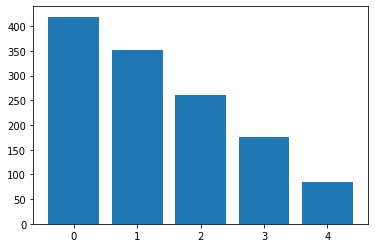

In [37]:
plt.bar(range(len(temp1.values)), temp1.values.tolist())

In [39]:
temp1

url
/product_list      419.0
/product_detail    351.0
/cart              261.0
/checkout          175.0
/order_complete     84.0
dtype: float64

In [38]:
from plotly import graph_objects as go

In [41]:
fig = go.Figure(go.Funnel(
y = temp1,
x = sorted(temp1.values.tolist())))

fig.show()